In [594]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

### Levanto la tabla de la pagina Humsavar sin el prologo y la coda

In [71]:
hum = pd.read_csv("../data/interim/humsavar_clean_201711.csv.gz", sep=",")

In [72]:
hum.columns = hum.columns.str.replace(" ", "_")

In [73]:
hum.shape

(76730, 7)

In [74]:
hum.Type_of_variant.value_counts()

Polymorphism    39655
Disease         29726
Unclassified     7349
Name: Type_of_variant, dtype: int64

In [75]:
hum.columns

Index(['Main_gene_name', 'Swiss_Prot_AC', 'FTId', 'AA_Change',
       'Type_of_variant', 'dbSNP', 'Disease_Name'],
      dtype='object')

### Los duplicados de la tabla humsaVar varian solo en su Disease Name

In [76]:
hum[hum[["Main_gene_name", "Swiss_Prot_AC", "AA_Change"]].duplicated(keep=False)].head()

,Main_gene_name,Swiss_Prot_AC,FTId,AA_Change,Type_of_variant,dbSNP,Disease_Name
228,ABCA4,P78363,VAR_008401,p.Gly65Glu,Disease,rs62654395,Cone-rod dystrophy 3 (CORD3) [MIM:604116]
229,ABCA4,P78363,VAR_008401,p.Gly65Glu,Disease,rs62654395,Stargardt disease 1 (STGD1) [MIM:248200]
234,ABCA4,P78363,VAR_008406,p.Arg212Cys,Disease,rs61750200,Cone-rod dystrophy 3 (CORD3) [MIM:604116]
235,ABCA4,P78363,VAR_008406,p.Arg212Cys,Disease,rs61750200,Stargardt disease 1 (STGD1) [MIM:248200]
240,ABCA4,P78363,VAR_008411,p.Ala407Val,Disease,rs61751264,Cone-rod dystrophy 3 (CORD3) [MIM:604116]


In [77]:
#Correspondencia hecha por Santi
AMINO_CODE = {"Ala": "A",\
              "Arg": "R",\
              "Asn": "N",\
              "Asp": "D",\
              "Cys": "C",\
              "Gln": "Q",\
              "Glu": "E",\
              "Gly": "G",\
              "His": "H",\
              "Ile": "I",\
              "Leu": "L",\
              "Lys": "K",\
              "Met": "M",\
              "Phe": "F",\
              "Pro": "P",\
              "Ser": "S",\
              "Thr": "T",\
              "Trp": "W",\
              "Tyr": "Y",\
              "Val": "V",\
              "Sec": "U"
             }

Formateo la tabla para coincidir con formato Uniprot-Pos-Amino1-Amino2

In [78]:
hum.head()

,Main_gene_name,Swiss_Prot_AC,FTId,AA_Change,Type_of_variant,dbSNP,Disease_Name
0,A1BG,P04217,VAR_018369,p.His52Arg,Polymorphism,rs893184,NaN
1,A1BG,P04217,VAR_018370,p.His395Arg,Polymorphism,rs2241788,NaN
2,A1CF,Q9NQ94,VAR_052201,p.Val555Met,Polymorphism,rs9073,NaN
3,A1CF,Q9NQ94,VAR_059821,p.Ala558Ser,Polymorphism,rs11817448,NaN
4,A2ML1,A8K2U0,VAR_055463,p.Gly207Arg,Polymorphism,rs11047499,NaN


In [79]:
df = pd.DataFrame(data=(hum["AA_Change"].str[2:].str.split(r"([0-9]+)")).tolist(), columns=["C1", "C2", "C3"])
df["C1"] = df.C1.map(AMINO_CODE)
df["C3"] = df.C3.map(AMINO_CODE)
mutant = pd.Series(data=(hum["Swiss_Prot_AC"] + "-" + df.C2 + "-" + df.C1 + "-" + df.C3).tolist(), name="MUTANT")

In [80]:
hum_final = pd.concat([hum, mutant], 1)[["Swiss_Prot_AC", "Main_gene_name", "Type_of_variant", "MUTANT", "AA_Change", "dbSNP"]]

In [81]:
hum_final.head()

,Swiss_Prot_AC,Main_gene_name,Type_of_variant,MUTANT,AA_Change,dbSNP
0,P04217,A1BG,Polymorphism,P04217-52-H-R,p.His52Arg,rs893184
1,P04217,A1BG,Polymorphism,P04217-395-H-R,p.His395Arg,rs2241788
2,Q9NQ94,A1CF,Polymorphism,Q9NQ94-555-V-M,p.Val555Met,rs9073
3,Q9NQ94,A1CF,Polymorphism,Q9NQ94-558-A-S,p.Ala558Ser,rs11817448
4,A8K2U0,A2ML1,Polymorphism,A8K2U0-207-G-R,p.Gly207Arg,rs11047499


In [82]:
hum_final.shape

(76730, 6)

In [83]:
for e, group in enumerate(hum_final[hum_final.duplicated(keep=False)].groupby("MUTANT")["dbSNP"]):
    if group[1].value_counts().shape[0] > 1:
        print(group[1].value_counts())
        print("ERROR!")

In [84]:
hum_final.Type_of_variant.isnull().sum()

0

In [286]:
hum_final.drop_duplicates(inplace=True)

In [287]:
hum_final.rename(columns={"Type_of_variant": "TYPE"}, inplace=True)

In [288]:
hum_final = hum_final[hum_final.TYPE != "Unclassified"]

In [289]:
hum_final.shape

(68523, 6)

In [290]:
hum_final.Swiss_Prot_AC.drop_duplicates().shape

(12438,)

In [291]:
hum_final.TYPE.value_counts()

Polymorphism    39655
Disease         28868
Name: TYPE, dtype: int64

In [292]:
hum_final.head()

,Swiss_Prot_AC,Main_gene_name,TYPE,MUTANT,AA_Change,dbSNP
0,P04217,A1BG,Polymorphism,P04217-52-H-R,p.His52Arg,rs893184
1,P04217,A1BG,Polymorphism,P04217-395-H-R,p.His395Arg,rs2241788
2,Q9NQ94,A1CF,Polymorphism,Q9NQ94-555-V-M,p.Val555Met,rs9073
3,Q9NQ94,A1CF,Polymorphism,Q9NQ94-558-A-S,p.Ala558Ser,rs11817448
4,A8K2U0,A2ML1,Polymorphism,A8K2U0-207-G-R,p.Gly207Arg,rs11047499


### Levanto tabla clinvar de Santi

In [606]:
clinvar = pd.read_csv("../data/interim/mutations.tsv", sep="\t", header=None, names=["MUTANT", "TYPE"])

In [607]:
clinvar.shape

(66474, 2)

In [608]:
clinvar.head()

,MUTANT,TYPE
0,Q92610-1046-G-R,Uncertain significance
1,Q96CU9-430-N-S,Pathogenic
2,Q8TB37-56-G-R,Pathogenic;Uncertain significance
3,Q30201-282-C-Y,Benign;Pathogenic;association;risk factor
4,Q30201-63-H-D,Likely benign;Pathogenic;risk factor


In [610]:
clinvar.TYPE.value_counts().head(7)

Uncertain significance                  27659
Pathogenic                              16160
not provided                            6735 
Likely pathogenic                       3613 
Benign                                  3576 
Likely benign                           3256 
Likely benign;Uncertain significance    932  
Name: TYPE, dtype: int64

In [611]:
clinvar.drop_duplicates(inplace=True)

In [612]:
clinvar.shape

(66217, 2)

In [613]:
clinvar.TYPE.isnull().sum()

0

In [614]:
clinvar = clinvar[(clinvar.TYPE == "Benign") | (clinvar.TYPE == "Pathogenic")]

In [615]:
clinvar.shape

(19566, 2)

In [281]:
clinvar.TYPE.value_counts()

Pathogenic    15993
Benign        3573 
Name: TYPE, dtype: int64

### Combino la tabla humsavar y clinvar para ver clasificaciones

In [293]:
hum_final.shape

(68523, 6)

In [294]:
clinvar.shape

(19566, 2)

In [297]:
combined = clinvar.merge(hum_final, right_on="MUTANT", left_on="MUTANT", suffixes=["_clinvar", "_humsavar"], how="outer")

In [299]:
combined = combined.drop_duplicates("MUTANT")

#### Interseccion

In [302]:
combined[~combined.TYPE_clinvar.isnull() & ~combined.TYPE_humsavar.isnull()].shape

(11780, 7)

### Merge con tabla VarQ

In [694]:
varq_new = pd.read_csv("/home/marlan/Documents/Tesis/properties-varq.tab", "\t")

In [787]:
varq_new.ACTIVE_SITE.isnull().sum() / varq_new.shape[0]

0.94788034501743434

In [707]:
varq_new = varq_new[~varq_new.TYPE.isnull()]
varq_new.merge(combined, on="MUTANT").TYPE.value_counts()

Pathogenic    5636
Benign        874 
Name: TYPE, dtype: int64

In [702]:
varq_new.describe()

,SASA,SASA_PERCENTAGE,BFACTOR,SWITCHBILITY,AGGREGABILITY,CONSERVATION,VARIATION_ENERGY,PROBABILITY
count,10388.000000,10388.000000,10388.000000,9687.000000,7719.000000,3542.000000,10898.000000,10898.000000
mean,32.420731,0.152184,61.610823,0.400149,5.127920,0.335940,2.743701,57.505964
std,38.955250,0.175307,74.634135,0.922928,17.923692,0.288565,4.585165,49.435663
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.130000,-13.530900,0.000000
25%,0.966000,0.000000,21.066250,0.000000,0.000000,0.250000,0.256540,0.000000
50%,16.208000,0.080000,41.277500,0.011900,0.000000,0.300000,1.461145,100.000000
75%,52.411000,0.270000,66.005000,0.309000,0.166000,0.370000,3.691327,100.000000
max,254.526000,0.750000,580.680000,9.720000,100.000000,11.700000,73.294400,100.000000


In [604]:
varq = pd.read_csv("../data/processed/properties-varq.tab.gz", sep="\t")
# varq = varq[~varq.TYPE.isnull()]

In [605]:
varq.shape

(17869, 12)

In [337]:
clinvar_varq = varq.merge(clinvar, on="MUTANT")

In [338]:
clinvar_varq.TYPE_y.value_counts()

Pathogenic    2397
Benign        138 
Name: TYPE_y, dtype: int64

In [341]:
hum_varq = varq.merge(hum_final, on="MUTANT")

In [342]:
hum_varq.TYPE_y.value_counts()

Disease         4667
Polymorphism    1983
Name: TYPE_y, dtype: int64

In [343]:
with_type = varq.merge(combined, on="MUTANT")
# with_type = with_type[~with_type.TYPE_humsavar.isnull() | ~with_type.TYPE_clinvar.isnull()]

In [344]:
with_type[with_type.TYPE_humsavar.isnull() & with_type.TYPE_clinvar.isnull()]

,MUTANT,SASA,SASA_PERCENTAGE,BFACTOR,SWITCHBILITY,AGGREGABILITY,CONSERVATION,3DID,PDB,ACTIVE_SITE,VARIATION_ENERGY,TYPE,TYPE_clinvar,Swiss_Prot_AC,Main_gene_name,TYPE_humsavar,AA_Change,dbSNP


In [345]:
with_type.shape

(7418, 18)

In [346]:
with_type[~with_type.TYPE_humsavar.isnull()].TYPE_humsavar.value_counts()

Disease         4667
Polymorphism    1983
Name: TYPE_humsavar, dtype: int64

In [347]:
with_type[with_type.TYPE_humsavar.isnull()].TYPE_clinvar.value_counts()

Pathogenic    710
Benign        58 
Name: TYPE_clinvar, dtype: int64

In [348]:
with_type.TYPE_clinvar.value_counts()

Pathogenic    2397
Benign        138 
Name: TYPE_clinvar, dtype: int64

In [391]:
with_type = with_type.replace({"TYPE_humsavar":{"Disease": "Pathogenic", "Polymorphism": "Benign"}})

In [401]:
with_type["TYPE"] = np.where(with_type.TYPE_humsavar.isnull(), with_type.TYPE_clinvar, with_type.TYPE_humsavar)
with_type.drop(["TYPE_humsavar", "TYPE_clinvar", "Swiss_Prot_AC", "Main_gene_name", "AA_Change", "dbSNP"], axis=1, inplace=True)

In [788]:
with_type.TYPE.value_counts()

Pathogenic    5377
Benign        2041
Name: TYPE, dtype: int64

In [411]:
with_type.columns

Index(['MUTANT', 'SASA', 'SASA_PERCENTAGE', 'BFACTOR', 'SWITCHBILITY',
       'AGGREGABILITY', 'CONSERVATION', '3DID', 'PDB', 'ACTIVE_SITE',
       'VARIATION_ENERGY', 'TYPE'],
      dtype='object')

In [790]:
with_type.to_csv("../data/processed/varq_clean.csv.gz", sep=",", compression="gzip", index=False)

In [708]:
nulcount

3DID                0.000000
PDB                 0.000000
VARIATION_ENERGY    0.000000
TYPE                0.000000
SASA                0.046913
SASA_PERCENTAGE     0.046913
BFACTOR             0.046913
SWITCHBILITY        0.096252
AGGREGABILITY       0.280803
CONSERVATION        0.630359
ACTIVE_SITE         0.955514
dtype: float64

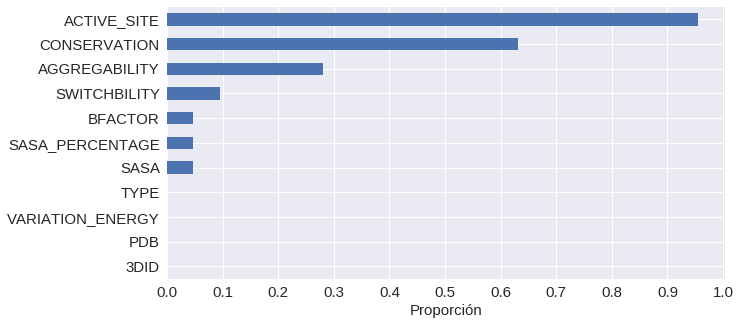

In [783]:
nulcount = (with_type.isnull().sum(axis=0) / with_type.shape[0]).sort_values(ascending=True).drop("MUTANT", 0)
plt.figure(figsize=(10,5))
# plt.title("Cantidad de variantes con valor nulo")
plt.yticks(size=15)
plt.xticks(np.arange(0, 2, 0.1), size=15)

plt.xlabel("Proporción", size=15)
ax = nulcount.plot(kind="barh")

plt.savefig("proporcion_nulos.pdf", bbox_inches='tight')


In [736]:
nulvars.value_counts(normalize=True)

1    0.355756
2    0.345915
3    0.191696
7    0.046913
4    0.038150
0    0.021569
dtype: float64

In [730]:
range?

In [731]:
range(1, 11)

range(1, 11)

In [742]:
plt.hist?

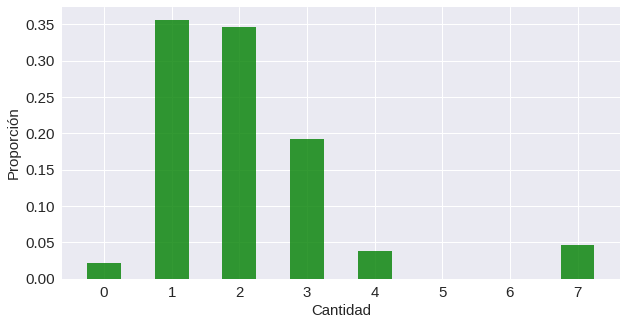

In [760]:
nulvars = with_type.isnull().sum(axis=1)
plt.figure(figsize=(10,5))
# plt.title("Cantidad de variables nulas")
plt.xlabel("Cantidad", size=15)
plt.ylabel("Proporción", size=15)
plt.xticks(np.arange(0,10,1), size=15)
plt.yticks(size=15)
plt.hist(nulvars, normed=True, align="left", bins=range(0, 9), rwidth=0.5, color="green", alpha=0.8)


# plt.show()
plt.savefig("foo.pdf", bbox_inches='tight')


In [693]:
with_type[["ACTIVE_SITE", "PDB", "3DID"]].describe()

,ACTIVE_SITE,PDB,3DID
count,330,7418,7418
unique,1,2,2
top,BINDING,False,False
freq,330,6696,5939


In [476]:
with_type.describe().to_csv("/home/marlan/Desktop/describe.csv", float_format="%.2f", index=True)

## Ver si los unlabeled aparecen en la tabla variants

### Tabla de Variantes que encontre en el sitio ClinVar

In [358]:
variants = pd.read_csv("../data/external/variant_summary.txt.gz", sep="\t")
variants = variants[variants.Type == "single nucleotide variant"][["Name", "ClinicalSignificance", "OtherIDs"]].reset_index().drop("index", axis=1)

/home/marlan/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [359]:
pd.set_option('display.max_colwidth', -1)
variants.head(25)

,Name,ClinicalSignificance,OtherIDs
0,NM_014630.2(ZNF592):c.3136G>A (p.Gly1046Arg),Uncertain significance,"OMIM Allelic Variant:613624.0001,UniProtKB (protein):Q92610#VAR_064583"
1,NM_014630.2(ZNF592):c.3136G>A (p.Gly1046Arg),Uncertain significance,"OMIM Allelic Variant:613624.0001,UniProtKB (protein):Q92610#VAR_064583"
2,NM_017547.3(FOXRED1):c.694C>T (p.Gln232Ter),Pathogenic,OMIM Allelic Variant:613622.0001
3,NM_017547.3(FOXRED1):c.694C>T (p.Gln232Ter),Pathogenic,OMIM Allelic Variant:613622.0001
4,NM_017547.3(FOXRED1):c.1289A>G (p.Asn430Ser),Pathogenic,"OMIM Allelic Variant:613622.0002,UniProtKB (protein):Q96CU9#VAR_064571"
5,NM_017547.3(FOXRED1):c.1289A>G (p.Asn430Ser),Pathogenic,"OMIM Allelic Variant:613622.0002,UniProtKB (protein):Q96CU9#VAR_064571"
6,NM_025152.2(NUBPL):c.166G>A (p.Gly56Arg),Uncertain significance,"OMIM Allelic Variant:613621.0001,UniProtKB (protein):Q8TB37#VAR_064570"
7,NM_025152.2(NUBPL):c.166G>A (p.Gly56Arg),Uncertain significance,"OMIM Allelic Variant:613621.0001,UniProtKB (protein):Q8TB37#VAR_064570"
8,NM_000410.3(HFE):c.892+48G>A,Benign,OMIM Allelic Variant:613609.0004
9,NM_000410.3(HFE):c.892+48G>A,Benign,OMIM Allelic Variant:613609.0004


In [360]:
variants.shape

(617055, 3)

In [361]:
variants.ClinicalSignificance.value_counts().head()

Uncertain significance                          271194
Likely benign                                   118245
Pathogenic                                      66105 
Benign                                          48776 
Conflicting interpretations of pathogenicity    30462 
Name: ClinicalSignificance, dtype: int64

In [362]:
variants.columns

Index(['Name', 'ClinicalSignificance', 'OtherIDs'], dtype='object')

In [363]:
amino = variants.Name.str.extract('(?P<C1>[A-Z]{1}[a-z]{2})(?P<C2>\d+)(?P<C3>[A-Z]{1}[a-z]{2})', expand=True)
protein = variants.OtherIDs.str.extract('\(protein\):(?P<Protein>[A-Z,\d]+)#', expand=True)
amino["C1"] = amino.C1.map(AMINO_CODE)
amino["C3"] = amino.C3.map(AMINO_CODE)
mutant = pd.Series(data=(protein.Protein + "-" + amino.C2 + "-" + amino.C1 + "-" + amino.C3).tolist(), name="MUTANT")

In [364]:
variants = pd.concat([variants, mutant], 1)
variants = variants[~variants.MUTANT.isnull()][["MUTANT", "ClinicalSignificance"]].drop_duplicates()
variants.rename(columns={"ClinicalSignificance": "TYPE"}, inplace=True)
variants = variants[(variants.TYPE == "Pathogenic") | (variants.TYPE == "Benign")]

In [366]:
variants.head()

,MUTANT,TYPE
4,Q96CU9-430-N-S,Pathogenic
10,Q30201-53-V-M,Benign
17,Q30201-105-I-T,Pathogenic
19,Q30201-93-G-R,Pathogenic
22,Q30201-59-V-M,Benign


In [368]:
variants.TYPE.value_counts().head(7)

Pathogenic    9282
Benign        1445
Name: TYPE, dtype: int64

In [375]:
variants.merge(varq, on="MUTANT", suffixes=["clinvar", "santi"]).shape

(1622, 13)

In [376]:
variants.TYPE.value_counts()

Pathogenic    9282
Benign        1445
Name: TYPE, dtype: int64

### No, no hay ni un unlabeled que podamos clasificar usando variants.